/home/tarnished-dan22/INBRE_Fellowship2023/green_channel_files/greenImgs/frames_1/013020_Lgalsbpb_GFPpos_NoTreatment_T01_XY1_Z10_RGB_Green.tif


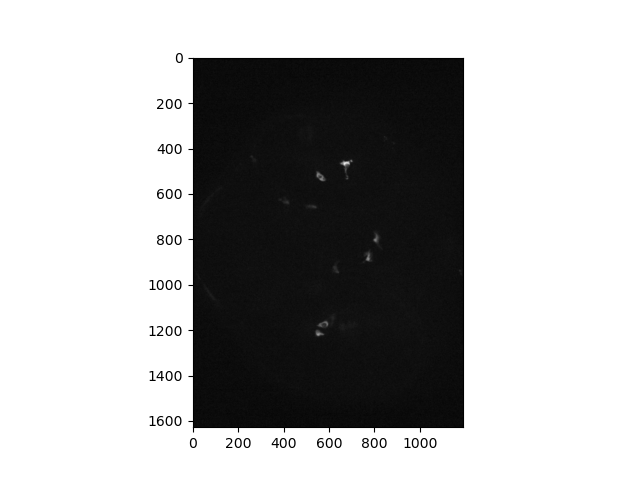

In [7]:
from skimage import io
import os

import numpy as np
import glob
import matplotlib.pyplot as plt
import ipympl
import imageio.v3 as iio
from skimage import color
from skimage import filters
%matplotlib widget

current_dir = os.getcwd()
# print(current_dir)

path = str(current_dir) + "/frames_1/013020_Lgalsbpb_GFPpos_NoTreatment_T01_XY1_Z10_RGB_Green.tif"

print(path)
im = io.imread(path, plugin='pil')

gray_img = color.rgb2gray(im)

blurred_img = filters.gaussian(gray_img, sigma=1.0)

fig, ax = plt.subplots()

# imarray = np.array(im)

# print(imarray.shape)
# print(imarray.size)
# print(imarray)
plt.imshow(blurred_img, cmap='gray')




# import glob, os

# path = str(os.getcwd() + "/frames_1/")

# print(path)

# list = []

# # dirs=directories
# for (root, dirs, files) in os.walk(path):
#     for f in files:
#         if '.tif' in f:
#             print(f)

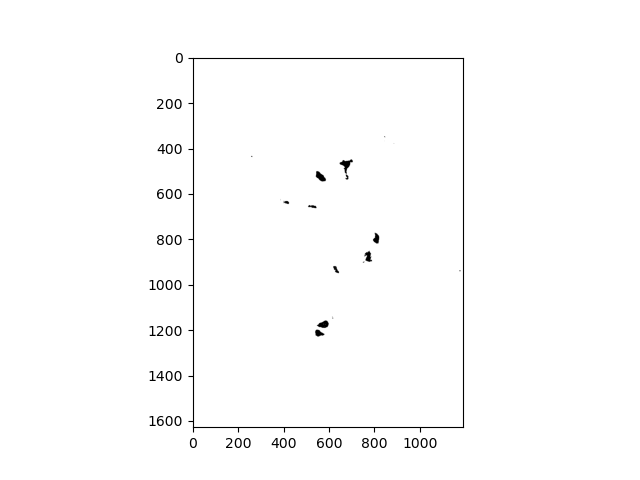

In [3]:
# create a mask based on the threshold
t = 0.1
binary_mask = blurred_img < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

(0.0, 1.0)

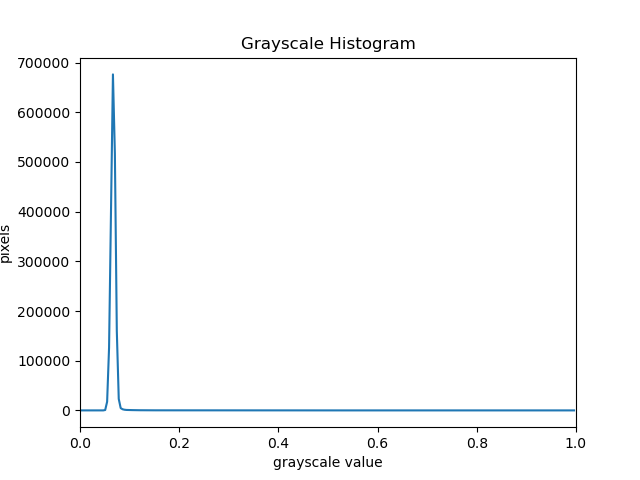

In [8]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(blurred_img, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)

In [ ]:
# automatic thresholding tests

path = str(current_dir) + "/frames_1/013020_Lgalsbpb_GFPpos_NoTreatment_T01_XY1_Z10_RGB_Green.tif"

# print(path)
im = io.imread(path, plugin='pil')

fig, ax = plt.subplots()
plt.imshow(im)

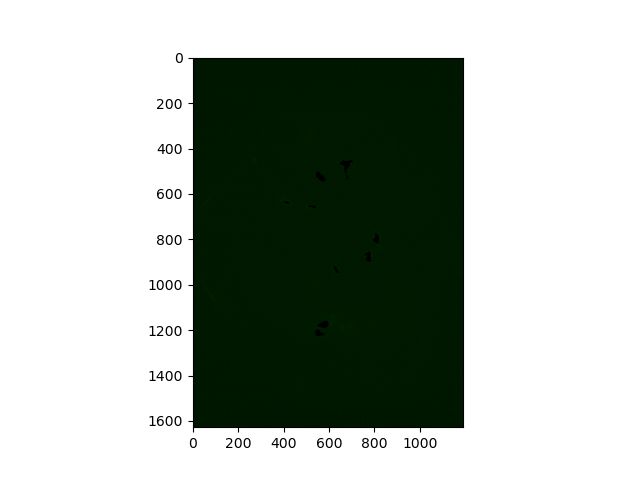

In [9]:
# use the binary_mask to select the "interesting" part of the image
selection = im.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)

In [ ]:
# perform automatic thresholding
t = filters.threshold_otsu(blurred_image)
print("Found automatic threshold t = {}.".format(t))

(0.0, 1.0)

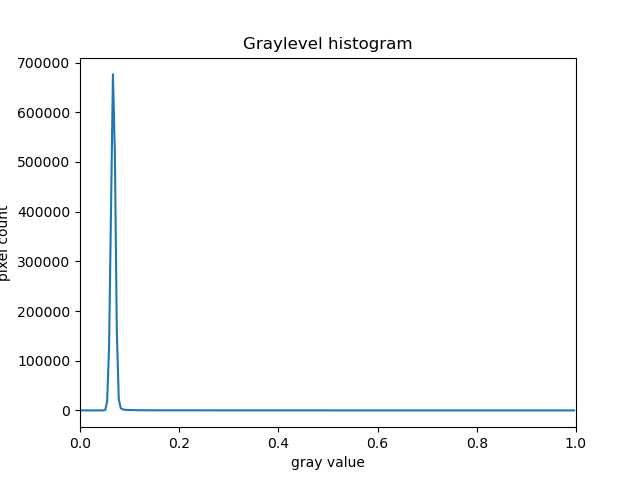

In [10]:
# convert the image to grayscale
gray_image = color.rgb2gray(im)

# blur the image to denoise
blurred_image = filters.gaussian(gray_image, sigma=1.0)

# show the histogram of the blurred image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)

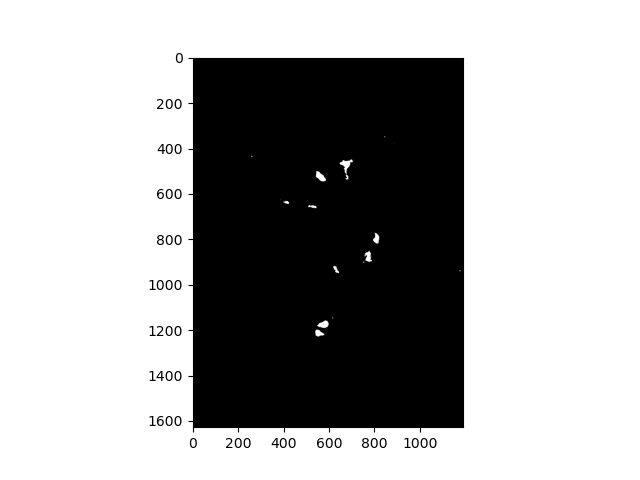

In [11]:
# create a binary mask with the threshold found by Otsu's method
binary_mask = blurred_image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

In [ ]:
# display images
fig = plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom=0.1, right=0.5, top=0.9)
rows=2
cols=2

fig.add_subplot(rows, cols, 1)
# display original image
plt.imshow(im)
plt.axis('on')
plt.title('Specimen #1: Frame 1 of 97, Z-pos: 10')

fig.add_subplot(rows, cols, 2)
# display original image
plt.imshow(binary_mask, cmap="gray")
plt.axis('on')
plt.title('bitmask')

fig.add_subplot(rows, cols, 3)
# display original image
plt.imshow(selection)
plt.axis('on')
plt.title('image with bitmask applied')

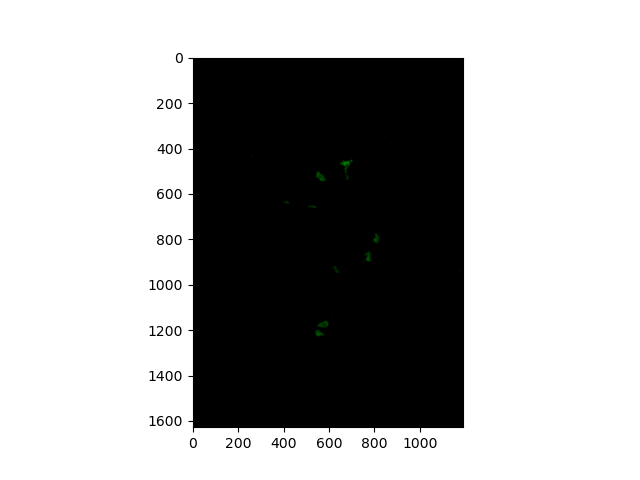

In [12]:
# apply the binary mask to select the foreground
selection = im.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)

In [16]:
# applying edge detection to images
path = str(current_dir) + "/frames_1/013020_Lgalsbpb_GFPpos_NoTreatment_T01_XY1_Z03_RGB_Green.tif"

im = io.imread(path, plugin='pil')

roberts_edge = filters.roberts(im)
plt.imshow(roberts_edge, cmap='gray')

In [17]:
# Time Series Frame 1 Specimen #1 Z-pos 3

path = str(current_dir) + "/frames_1/013020_Lgalsbpb_GFPpos_NoTreatment_T01_XY1_Z03_RGB_Green.tif"

# print(path)
im = io.imread(path, plugin='pil')

# fig, ax = plt.subplots()
# plt.imshow(im)

# convert the image to grayscale
gray_image = color.rgb2gray(im)

# blur the image to denoise
blurred_image = filters.gaussian(gray_image, sigma=1.0)

# show the histogram of the blurred image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
# fig, ax = plt.subplots()
# plt.plot(bin_edges[0:-1], histogram)
# plt.title("Graylevel histogram")
# plt.xlabel("gray value")
# plt.ylabel("pixel count")
# plt.xlim(0, 1.0)

# perform automatic thresholding
t = filters.threshold_otsu(blurred_image)
print("Found automatic threshold t = {}.".format(t))

# create a binary mask with the threshold found by Otsu's method
binary_mask = blurred_image > t

# fig, ax = plt.subplots()
# plt.imshow(binary_mask, cmap="gray")

# apply the binary mask to select the foreground
selection = im.copy()
selection[~binary_mask] = 0

# fig, ax = plt.subplots()
# plt.imshow(selection)

fig = plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
rows=2
cols=2

fig.add_subplot(rows, cols, 1)
# display original image
plt.imshow(im)
plt.axis('on')
plt.title('Specimen #1: Frame 1 of 97, Z-pos: 3')

fig.add_subplot(rows, cols, 2)
# display original image
plt.imshow(binary_mask, cmap="gray")
plt.axis('on')
plt.title('bitmask otsu')

fig.add_subplot(rows, cols, 3)
# display original image
plt.imshow(selection)
plt.axis('on')
plt.title('image with bitmask applied')